In [1]:
#定义selection_sort函数执行选择排序功能。
def selection_sort(a):
    #遍历整个列表。
    for i in range(len(a)):
        #假设当前元素为最小元素。
        min_index = i
        #遍历当前元素之后的所有元素。
        for j in range(i+1, len(a)):
            #如果当前元素比假设的最小元素还小，则将当前元素的索引赋值给min_index。
            if a[j] < a[min_index]:
                min_index = j
        #如果min_index的值没有发生改变，则说明当前元素就是最小元素。
        if min_index != i:
            #将当前元素和最小元素交换。
            a[i], a[min_index] = a[min_index], a[i]
    #返回排序后的列表。
    return a
#定义test函数进行测试，执行数据输入，并调用selection_sort函数进行排序，最后输出结果。
def test():
    #定义一个列表。
    a = [2, 1, 3, 5, 4]
    #调用selection_sort函数进行排序。
    print(selection_sort(a))
#调用test函数进行测试。
test()


[1, 2, 3, 4, 5]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fortune500.csv')

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']


In [6]:
len(df)

25500

In [7]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [8]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [9]:
len(df.profit[non_numberic_profits])


369

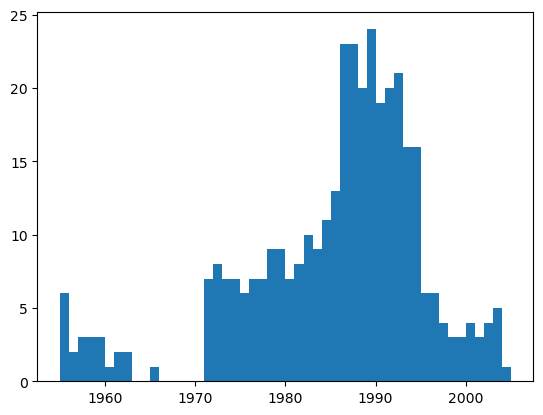

In [10]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))


In [11]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)


In [12]:
len(df)


25131

In [13]:
df.dtypes


year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [14]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)


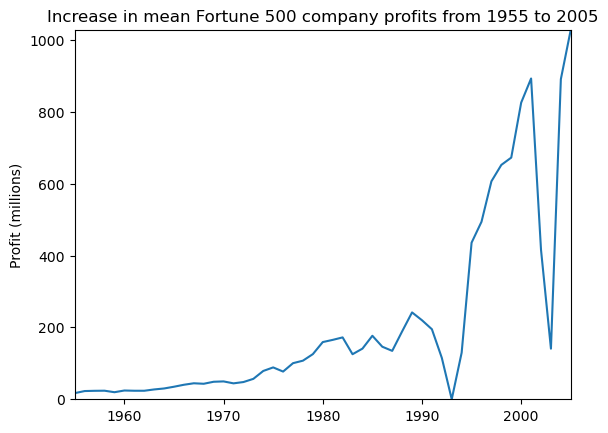

In [15]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')


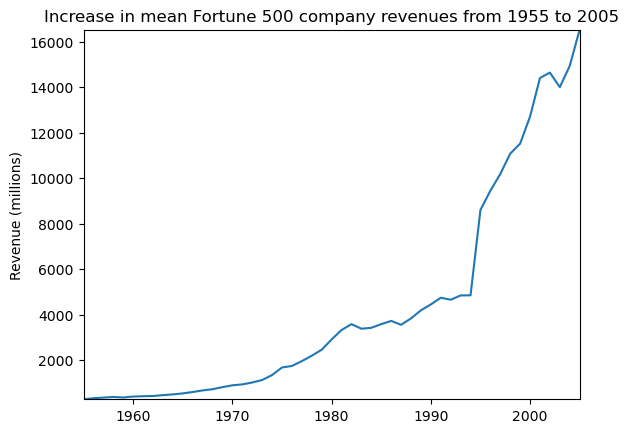

In [16]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')


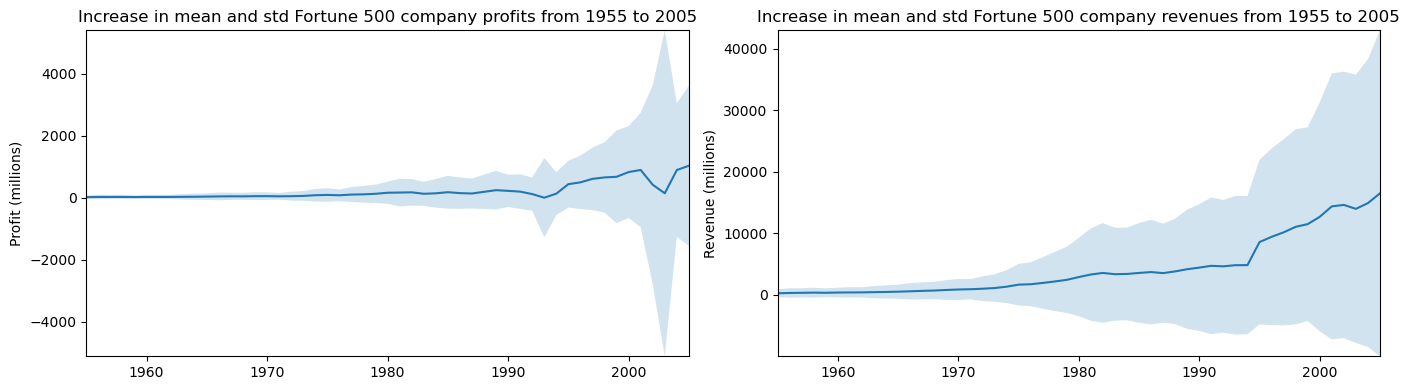

In [17]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()


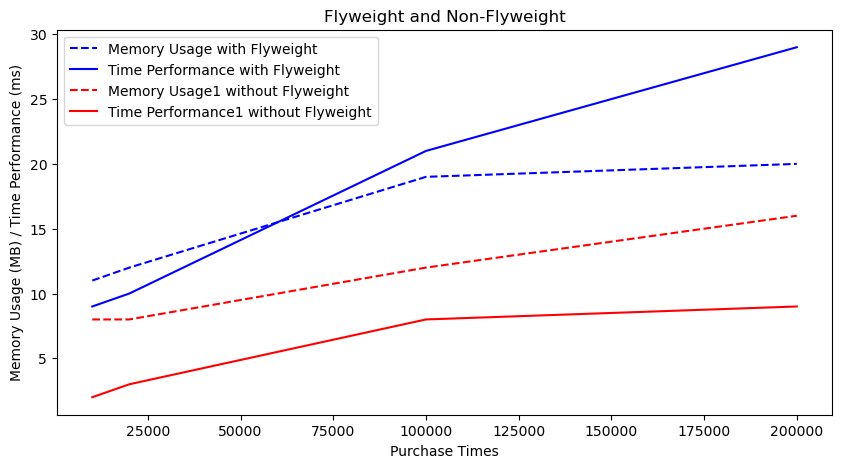

In [17]:
import matplotlib.pyplot as plt

# 第一组数据
x = [10000, 20000, 100000, 200000]
memory_usage = [11, 12, 19, 20]
time_performance = [9, 10, 21, 29]

# 第二组数据
memory_usage1 = [8, 8, 12, 16]
time_performance1 = [2, 3, 8, 9]

# 绘制第一个数据集
plt.plot(x, memory_usage, '--', color='blue', label='Memory Usage with Flyweight')
plt.plot(x, time_performance, color='blue', label='Time Performance with Flyweight')

# 绘制第二个数据集
plt.plot(x, memory_usage1, '--',color='red', label='Memory Usage1 without Flyweight')
plt.plot(x, time_performance1, color='red', label='Time Performance1 without Flyweight')

# 添加图例、坐标轴标签和标题
plt.legend(loc='best')
plt.xlabel('Purchase Times')
plt.ylabel('Memory Usage (MB) / Time Performance (ms)')
plt.title('Flyweight and Non-Flyweight')

# 显示图像
plt.show()
